In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/hotel-reviews/Hotel_Reviews.csv


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data = pd.read_csv("/kaggle/input/hotel-reviews/Hotel_Reviews.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


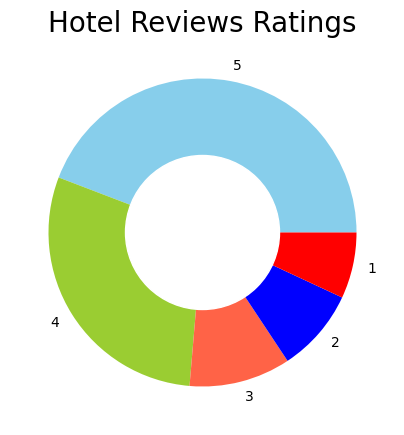

In [3]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [4]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

                                              Review  Rating  Positive  \
0  nice hotel expensive parking got good deal sta...       4     0.285   
1  ok nothing special charge diamond member hilto...       2     0.189   
2  nice rooms not 4* experience hotel monaco seat...       3     0.219   
3  unique, great stay, wonderful time hotel monac...       5     0.385   
4  great stay great stay, went seahawk game aweso...       5     0.221   

   Negative  Neutral  
0     0.072    0.643  
1     0.110    0.701  
2     0.081    0.700  
3     0.060    0.555  
4     0.135    0.643  


In [5]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [6]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6359.91000000002
Negative:  1473.4750000000038
Neutral:  12657.627999999937


people are really happy with the services of the hotels they have stayed in